[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/intro_to_ai/blob/master/ensemble_methods.ipynb)

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data

In [160]:
# https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval
df = pd.read_csv('https://alik-courses.web.app/intro-to-ai/datasets/loan_sanction_train.csv')

# Split the data for train, validation and test dataframes

In [161]:
df.shape

(614, 13)

In [5]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
train_df, val_df = train_test_split(train_val_df, test_size=0.3, random_state=0)

In [8]:
print(f'train data shape: {train_df.shape}, validation data shape: {val_df.shape}, test data shape: {test_df.shape}')

train data shape: (343, 13), validation data shape: (148, 13), test data shape: (123, 13)


# EDA and data cleaning

In [9]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
329,LP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
320,LP002051,Male,Yes,0,Graduate,No,2400,2167.0,115.0,360.0,1.0,Semiurban,Y
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 329 to 5
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            343 non-null    object 
 1   Gender             338 non-null    object 
 2   Married            341 non-null    object 
 3   Dependents         335 non-null    object 
 4   Education          343 non-null    object 
 5   Self_Employed      323 non-null    object 
 6   ApplicantIncome    343 non-null    int64  
 7   CoapplicantIncome  343 non-null    float64
 8   LoanAmount         328 non-null    float64
 9   Loan_Amount_Term   334 non-null    float64
 10  Credit_History     319 non-null    float64
 11  Property_Area      343 non-null    object 
 12  Loan_Status        343 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 37.5+ KB


<AxesSubplot: >

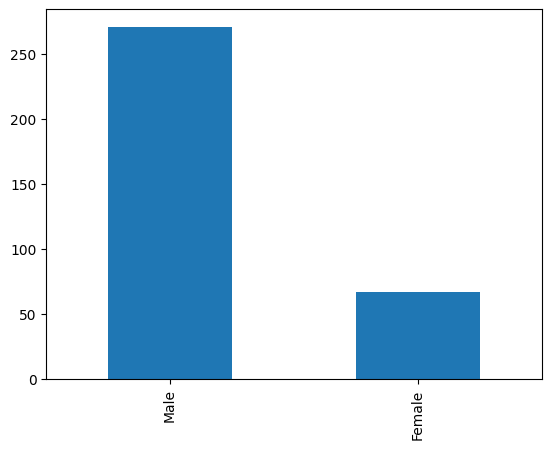

In [12]:
train_df.Gender.value_counts().plot(kind='bar')

<AxesSubplot: >

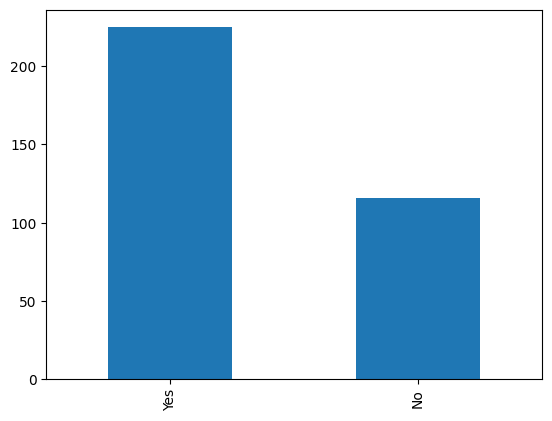

In [13]:
train_df.Married.value_counts().plot(kind='bar')

<AxesSubplot: >

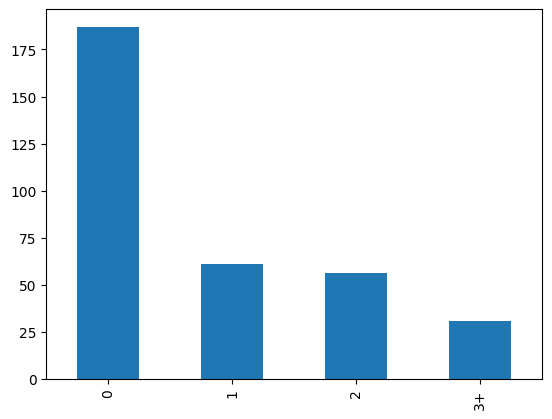

In [14]:
train_df.Dependents.value_counts().plot(kind='bar')

<AxesSubplot: >

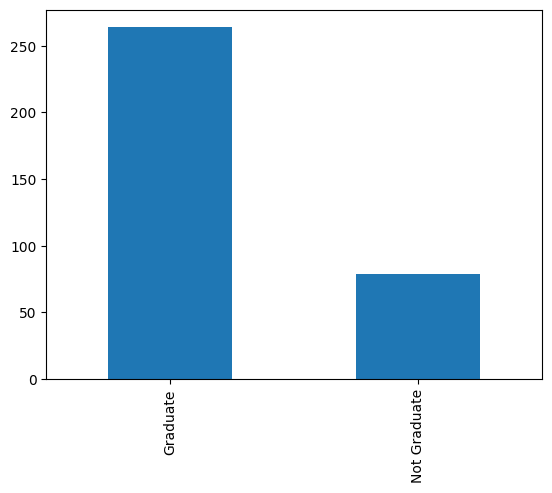

In [15]:
train_df.Education.value_counts().plot(kind='bar')

<AxesSubplot: >

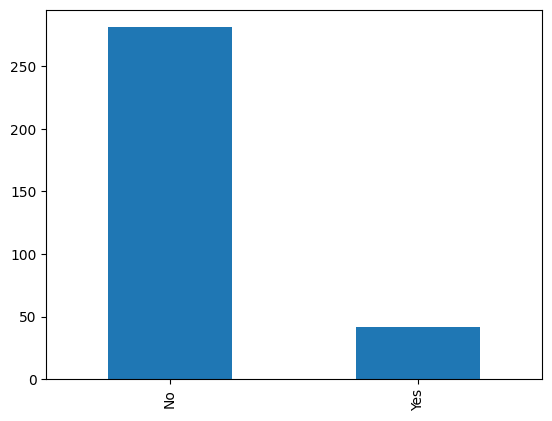

In [16]:
train_df.Self_Employed.value_counts().plot(kind='bar')

<AxesSubplot: >

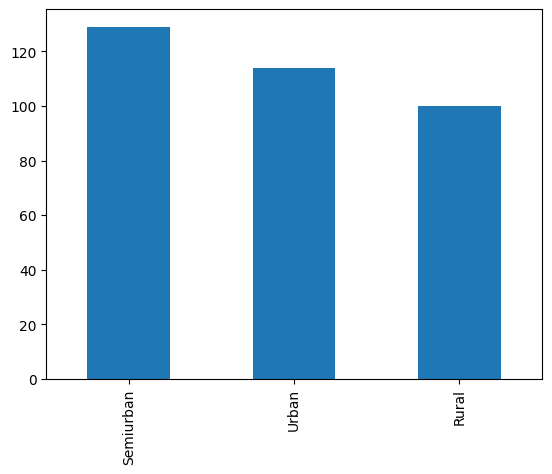

In [17]:
train_df.Property_Area.value_counts().plot(kind='bar')

<AxesSubplot: >

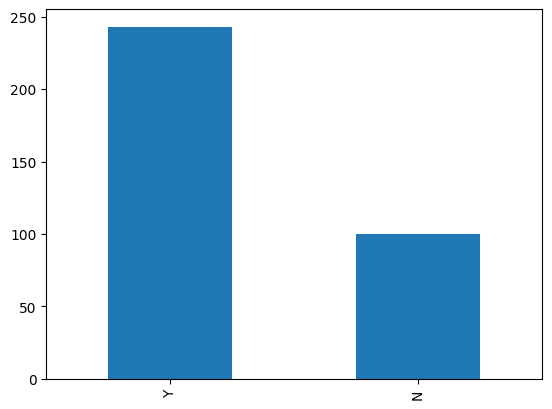

In [18]:
# target column
train_df.Loan_Status.value_counts().plot(kind='bar')

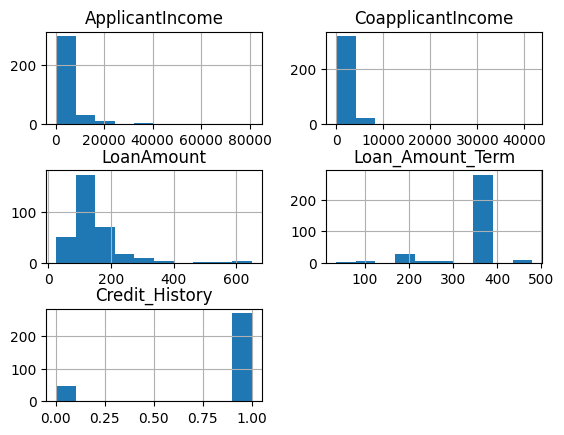

In [22]:
train_df.hist()
plt.subplots_adjust(hspace=0.5) 

In [23]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

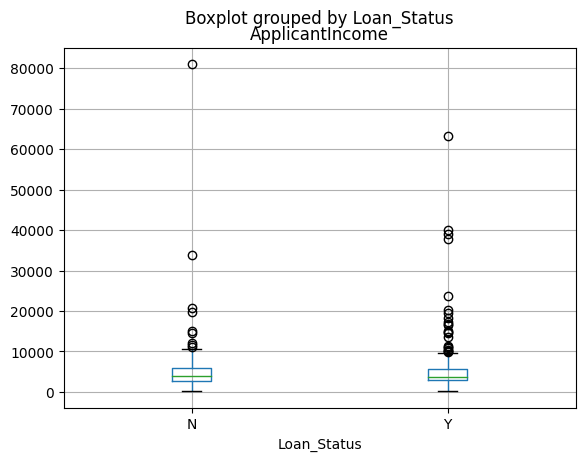

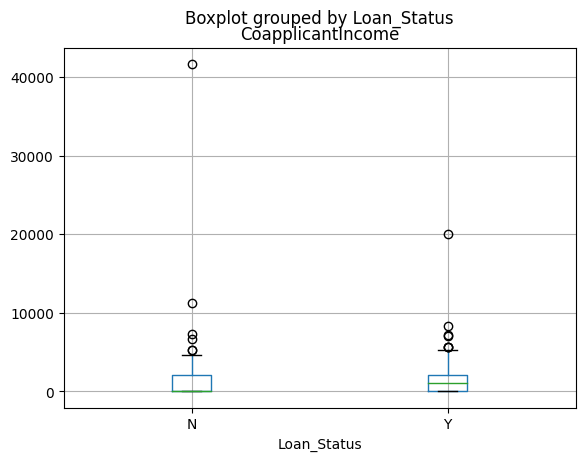

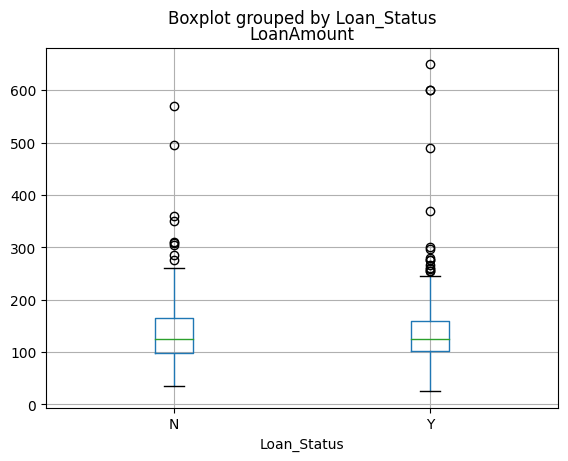

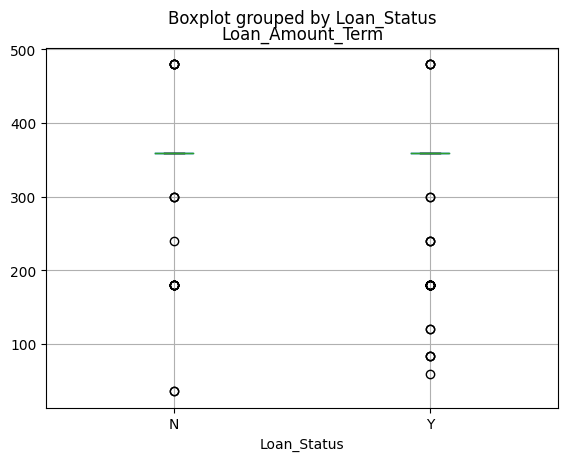

In [28]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    train_df.boxplot(column=col, by='Loan_Status')

##

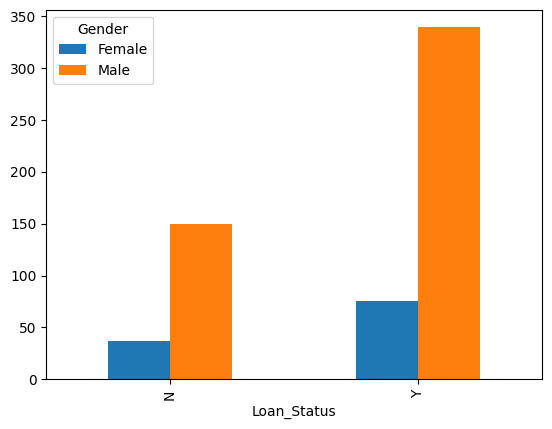

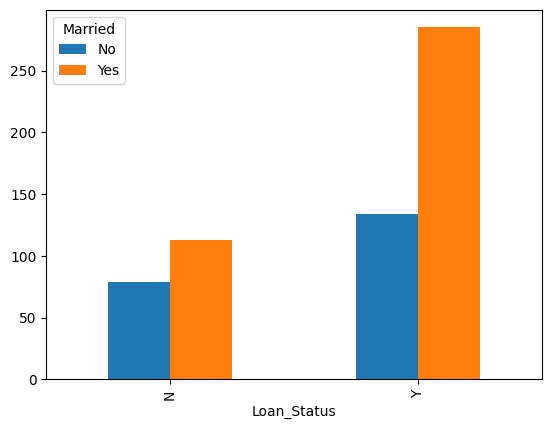

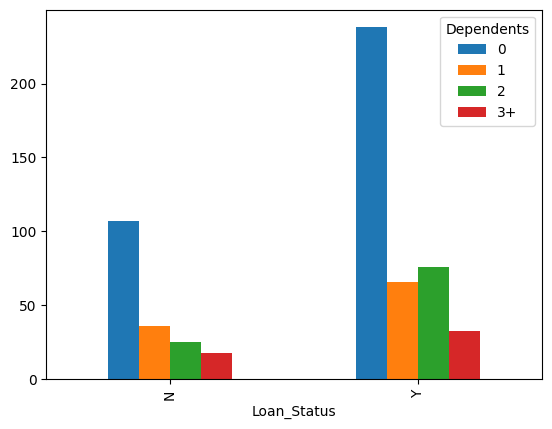

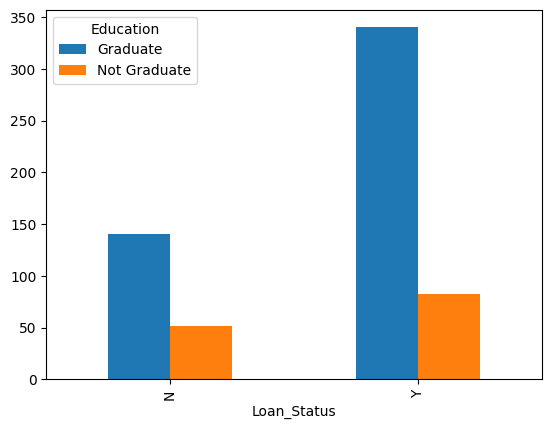

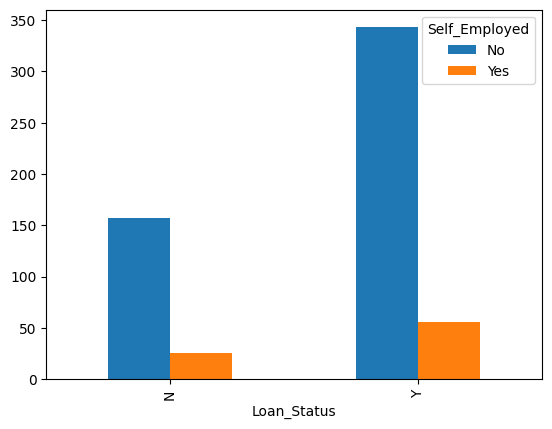

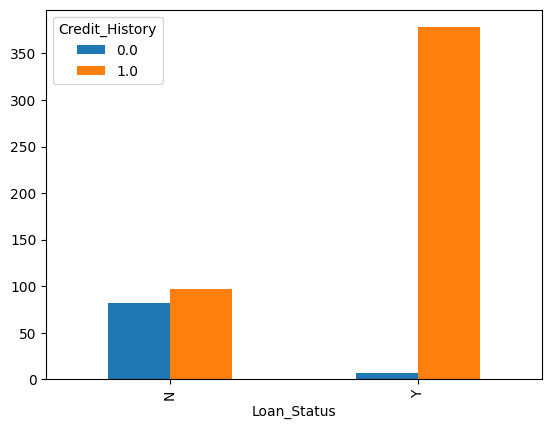

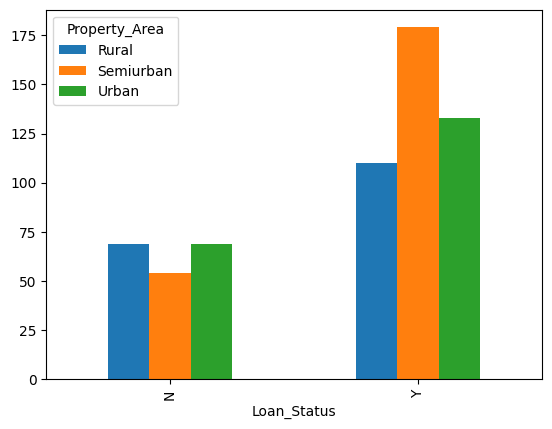

In [29]:
for categorical_col in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area']:
  (df[[categorical_col, 'Loan_Status']].value_counts()
    .to_frame('count').reset_index()
    .pivot(index='Loan_Status', columns=[categorical_col], values='count')
    .plot(kind='bar'))

To simplify, let's focus on these columns: 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', and 'Property_Area'.
Note that, for longer studies we can dive deeper into other columns as well.

In [34]:
study_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status']

In [37]:
train_df[study_columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
329,2500,0.0,67.0,1.0,Urban,Y
320,2400,2167.0,115.0,1.0,Semiurban,Y
39,3748,1668.0,110.0,1.0,Semiurban,Y
388,2333,2417.0,136.0,1.0,Urban,Y
369,19730,5266.0,570.0,1.0,Rural,N
...,...,...,...,...,...,...
267,4333,1811.0,160.0,0.0,Urban,Y
160,1863,1041.0,98.0,1.0,Semiurban,Y
306,3762,1666.0,135.0,1.0,Rural,Y
613,4583,0.0,133.0,0.0,Semiurban,N


In [39]:
# Drop the na rows
smaller_train_df = train_df[study_columns].dropna()
smaller_train_df.shape

(304, 6)

# Feature engineering

In [40]:
smaller_train_df.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [43]:
# One hot encoding the Property_Area
one_hot_encoded_property_area = pd.get_dummies(smaller_train_df['Property_Area'], prefix='Property_Area_')
one_hot_encoded_property_area

,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban
329,0,0,1
320,0,1,0
39,0,1,0
388,0,0,1
369,1,0,0
...,...,...,...
267,0,0,1
160,0,1,0
306,1,0,0
613,0,1,0


In [46]:
oh_train_df = pd.concat([smaller_train_df,one_hot_encoded_property_area], axis=1).drop(columns=['Property_Area'])
oh_train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban
329,2500,0.0,67.0,1.0,Y,0,0,1
320,2400,2167.0,115.0,1.0,Y,0,1,0
39,3748,1668.0,110.0,1.0,Y,0,1,0
388,2333,2417.0,136.0,1.0,Y,0,0,1
369,19730,5266.0,570.0,1.0,N,1,0,0
...,...,...,...,...,...,...,...,...
267,4333,1811.0,160.0,0.0,Y,0,0,1
160,1863,1041.0,98.0,1.0,Y,0,1,0
306,3762,1666.0,135.0,1.0,Y,1,0,0
613,4583,0.0,133.0,0.0,N,0,1,0


In [69]:
oh_train_df['Encoded_Loan_Status'] = oh_train_df.Loan_Status.map({'Y': 1, 'N': 0})
# Loan encoded
le_train_df = oh_train_df.drop(columns=['Loan_Status'])
le_train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Encoded_Loan_Status
329,2500,0.0,67.0,1.0,0,0,1,1
320,2400,2167.0,115.0,1.0,0,1,0,1
39,3748,1668.0,110.0,1.0,0,1,0,1
388,2333,2417.0,136.0,1.0,0,0,1,1
369,19730,5266.0,570.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...
267,4333,1811.0,160.0,0.0,0,0,1,1
160,1863,1041.0,98.0,1.0,0,1,0,1
306,3762,1666.0,135.0,1.0,1,0,0,1
613,4583,0.0,133.0,0.0,0,1,0,0


In [71]:
# Total_income added
le_train_df['Total_Income'] = le_train_df['ApplicantIncome'] + le_train_df['CoapplicantIncome']
fe_train_df = le_train_df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'])

In [72]:
fe_train_df.shape

(304, 7)

In [81]:
fe_train_df.head(5)

,LoanAmount,Credit_History,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Encoded_Loan_Status,Total_Income
329,67.0,1.0,0,0,1,1,2500.0
320,115.0,1.0,0,1,0,1,4567.0
39,110.0,1.0,0,1,0,1,5416.0
388,136.0,1.0,0,0,1,1,4750.0
369,570.0,1.0,1,0,0,0,24996.0


# Applying the same changes on other datasets

In [103]:
def update_data(df):
    smaller_df = df[study_columns].dropna()
    oh_property_area = pd.get_dummies(smaller_df['Property_Area'], prefix='Property_Area_')
    oh_df = pd.concat([smaller_df, oh_property_area], axis=1).drop(columns=['Property_Area'])
    oh_df['Encoded_Loan_Status'] = oh_df.Loan_Status.map({'Y': 1, 'N': 0})
    oh_df['Total_Income'] = oh_df['ApplicantIncome'] + oh_df['CoapplicantIncome']
    fe_train_df = oh_df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'Loan_Status'])
    return fe_train_df


In [104]:
fe_val_df = update_data(val_df)

In [105]:
fe_val_df

,LoanAmount,Credit_History,Property_Area__Rural,Property_Area__Semiurban,Property_Area__Urban,Encoded_Loan_Status,Total_Income
114,118.0,1.0,0,1,0,1,5050.0
276,207.0,1.0,0,1,0,1,7267.0
91,188.0,1.0,0,1,0,1,11904.0
438,187.0,0.0,0,0,1,0,10416.0
132,70.0,1.0,0,1,0,1,2718.0
...,...,...,...,...,...,...,...
308,480.0,1.0,1,0,0,0,20233.0
598,180.0,1.0,1,0,0,1,9963.0
425,121.0,1.0,1,0,0,1,6966.0
335,70.0,1.0,0,1,0,1,9993.0


# Training the base model

In [113]:
# Instantitate
log_reg = LogisticRegression()
# Train
log_reg.fit(fe_train_df[['Credit_History']], fe_train_df['Encoded_Loan_Status'])
# Predict
y_hat = log_reg.predict(fe_val_df[['Credit_History']])
# Evaluate
print(f"Accuracy score: {accuracy_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
print(f"Precision score: {precision_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
print(f"Recall score: {recall_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
print(f"f1 score: {f1_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")

Accuracy score: 0.7874015748031497
Precision score: 0.7378640776699029
Recall score: 1.0
f1 score: 0.8491620111731844


Because the final model will be used for assessing users eligibility for loans, we can focus on precision as the primary metric.

# Training more complex models

### Random forest classifier

In [120]:
def train_random_forest(cols, **kwargs):
  rfc = RandomForestClassifier(**kwargs)
  rfc.fit(fe_train_df[cols], fe_train_df['Encoded_Loan_Status'])

  print(f"Training set precision: {precision_score(fe_train_df['Encoded_Loan_Status'], rfc.predict(fe_train_df[cols]))}")

  y_hat = rfc.predict(fe_val_df[cols])

  print(f"Accuracy score: {accuracy_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  print(f"Precision score: {precision_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  print(f"Recall score: {recall_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  print(f"f1 score: {f1_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  return rfc

In [121]:
train_random_forest(['Credit_History'])

Training set precision: 0.8185328185328186
Accuracy score: 0.7874015748031497
Precision score: 0.7378640776699029
Recall score: 1.0
f1 score: 0.8491620111731844


RandomForestClassifier()

In [109]:
fe_train_df.columns

Index(['LoanAmount', 'Credit_History', 'Property_Area__Rural',
       'Property_Area__Semiurban', 'Property_Area__Urban',
       'Encoded_Loan_Status', 'Total_Income'],
      dtype='object')

In [122]:
rfc = train_random_forest(['Total_Income', 'Credit_History'])

Training set precision: 0.9863013698630136
Accuracy score: 0.7244094488188977
Precision score: 0.7303370786516854
Recall score: 0.8552631578947368
f1 score: 0.7878787878787878


In [123]:
rfc.feature_importances_

array([0.68551108, 0.31448892])

In [124]:
rfc = train_random_forest(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'])

Training set precision: 1.0
Accuracy score: 0.7165354330708661
Precision score: 0.7127659574468085
Recall score: 0.881578947368421
f1 score: 0.788235294117647


In [125]:
rfc.feature_importances_

array([0.36714222, 0.29803698, 0.29943719, 0.01235394, 0.01372395,
       0.00930573])

In [126]:
rfc = train_random_forest(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'], max_depth=5)

Training set precision: 0.8594377510040161
Accuracy score: 0.7716535433070866
Precision score: 0.7373737373737373
Recall score: 0.9605263157894737
f1 score: 0.8342857142857143


In [127]:
rfc = train_random_forest(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'], max_depth=4)

Training set precision: 0.8565737051792829
Accuracy score: 0.7795275590551181
Precision score: 0.74
Recall score: 0.9736842105263158
f1 score: 0.8409090909090909


In [128]:
rfc = train_random_forest(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'], n_estimators=1000)

Training set precision: 1.0
Accuracy score: 0.7322834645669292
Precision score: 0.723404255319149
Recall score: 0.8947368421052632
f1 score: 0.8


In [132]:
rfc = train_random_forest(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'], n_estimators=1000, max_depth=4)

Training set precision: 0.8531746031746031
Accuracy score: 0.7795275590551181
Precision score: 0.7448979591836735
Recall score: 0.9605263157894737
f1 score: 0.839080459770115


### Using XGBoost

https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

In [135]:
def train_xgboost(cols, **kwargs):
  xgb_clf = XGBClassifier(**kwargs)
  xgb_clf.fit(fe_train_df[cols], fe_train_df['Encoded_Loan_Status'])

  print(f"Training set precision: {precision_score(fe_train_df['Encoded_Loan_Status'], xgb_clf.predict(fe_train_df[cols]))}")

  
  y_hat = xgb_clf.predict(fe_val_df[cols])

  print(f"Accuracy score: {accuracy_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  print(f"Precision score: {precision_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  print(f"Recall score: {recall_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  print(f"f1 score: {f1_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
  return xgb_clf

In [136]:
train_xgboost(['Credit_History'])

Training set precision: 0.8185328185328186
Accuracy score: 0.7874015748031497
Precision score: 0.7378640776699029
Recall score: 1.0
f1 score: 0.8491620111731844


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [138]:
xgbc = train_xgboost(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'])

Training set precision: 0.9954128440366973
Accuracy score: 0.7401574803149606
Precision score: 0.7415730337078652
Recall score: 0.868421052631579
f1 score: 0.8


In [144]:
xgbc = train_xgboost(['Total_Income', 'Credit_History'], max_depth=2)

Training set precision: 0.8661087866108786
Accuracy score: 0.7559055118110236
Precision score: 0.7472527472527473
Recall score: 0.8947368421052632
f1 score: 0.8143712574850299


In [143]:
xgbc = train_xgboost(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'], max_depth=2)

Training set precision: 0.895397489539749
Accuracy score: 0.8031496062992126
Precision score: 0.7741935483870968
Recall score: 0.9473684210526315
f1 score: 0.8520710059171597


In [154]:
xgbc = train_xgboost(['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban'], max_depth=5, learning_rate =0.1)

Training set precision: 0.8991596638655462
Accuracy score: 0.7874015748031497
Precision score: 0.7525773195876289
Recall score: 0.9605263157894737
f1 score: 0.8439306358381503


### Voting classifier

In [157]:
cols = ['Total_Income', 'LoanAmount', 'Credit_History',
       'Property_Area__Rural', 'Property_Area__Semiurban',
       'Property_Area__Urban']

rfc = RandomForestClassifier(n_estimators=1000, max_depth=4)
xgbc = XGBClassifier(max_depth=2)

vc = VotingClassifier([('rfc', rfc), ('xgbc',xgbc)], voting='hard')
vc.fit(fe_train_df[cols], fe_train_df['Encoded_Loan_Status'])

print(f"Training set precision: {precision_score(fe_train_df['Encoded_Loan_Status'], vc.predict(fe_train_df[cols]))}")


y_hat = vc.predict(fe_val_df[cols])

print(f"Accuracy score: {accuracy_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
print(f"Precision score: {precision_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
print(f"Recall score: {recall_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")
print(f"f1 score: {f1_score(fe_val_df['Encoded_Loan_Status'], y_hat)}")

Training set precision: 0.8991596638655462
Accuracy score: 0.7952755905511811
Precision score: 0.7840909090909091
Recall score: 0.9078947368421053
f1 score: 0.8414634146341463


# Testing the best model on the test set

In [158]:
# We first need to apply all the cleaning and feature engineering steps we did for train and validation set on test set
fe_test_df = update_data(test_df)

In [159]:
test_y_hat = vc.predict(fe_test_df[cols])

print(f"Accuracy score: {accuracy_score(fe_test_df['Encoded_Loan_Status'], test_y_hat)}")
print(f"Precision score: {precision_score(fe_test_df['Encoded_Loan_Status'], test_y_hat)}")
print(f"Recall score: {recall_score(fe_test_df['Encoded_Loan_Status'], test_y_hat)}")
print(f"f1 score: {f1_score(fe_test_df['Encoded_Loan_Status'], test_y_hat)}")

Accuracy score: 0.7946428571428571
Precision score: 0.8452380952380952
Recall score: 0.8765432098765432
f1 score: 0.8606060606060606


Precision of 84% means that the model accurately selects people eligible for getting a loan.